In [2097]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [2098]:
data_file = "conso.txt"

In [2099]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [2100]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [2101]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


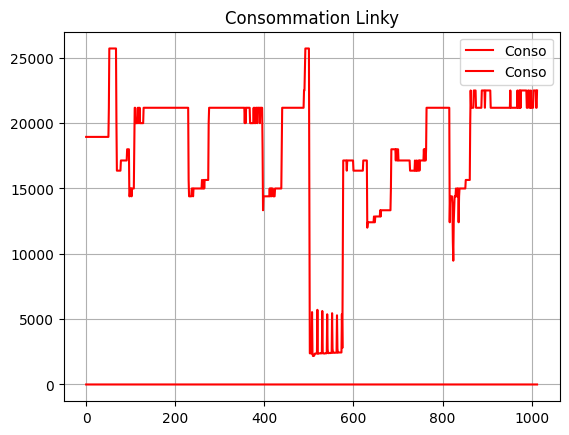

In [2102]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [2103]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [2104]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42961 entries, 0 to 42960
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  42961 non-null  int64  
 1   kWh       42961 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 671.4 KB


In [2105]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
42956,21444,0.17
42957,21475,0.17
42958,21079,0.17
42959,20932,0.17


In [2106]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
42956,21444,0.17,21.444,167.879127,1020460571
42957,21475,0.17,21.475,167.636787,1020482046
42958,21079,0.17,21.079,170.786090,1020503125
42959,20932,0.17,20.932,171.985477,1020524057


In [2107]:
# index dernier echantillon
l=len(conso_data)-1
l

42960

In [2108]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1020544734000

In [2109]:
old

False

In [2110]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 0, 23, 46, 332557)

In [2111]:

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42961 entries, 0 to 42960
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   42961 non-null  int64         
 1   kWh        42961 non-null  float64       
 2   sec        42961 non-null  float64       
 3   Wh         42961 non-null  float64       
 4   cumul(ms)  42961 non-null  int64         
 5   dates      42961 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.0 MB


In [2112]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:24:12.621557,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:24:38.864557,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:25:04.749557,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:25:30.503557,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:25:56.277557,07/03/2024
...,...,...,...,...,...,...,...
42956,21444,0.17,21.444,167.879127,1020460571,2024-03-18 19:51:26.903557,18/03/2024
42957,21475,0.17,21.475,167.636787,1020482046,2024-03-18 19:51:48.378557,18/03/2024
42958,21079,0.17,21.079,170.786090,1020503125,2024-03-18 19:52:09.457557,18/03/2024
42959,20932,0.17,20.932,171.985477,1020524057,2024-03-18 19:52:30.389557,18/03/2024


In [2113]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:24:12.621557   
 
          days  
 0  07/03/2024  ,
        Interval   kWh     sec          Wh   cumul(ms)  \
 42960     20677  0.17  20.677  174.106495  1020544734   
 
                            dates        days  
 42960 2024-03-18 19:52:51.066557  18/03/2024  )

In [2114]:
# tranche journalière
now = datetime.now()
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day

'18/03/2024'

07/03/2024 3.344
08/03/2024 3.76
09/03/2024 3.058
10/03/2024 3.569
11/03/2024 4.524
12/03/2024 3.552
13/03/2024 3.509
14/03/2024 3.703
15/03/2024 3.544


16/03/2024 3.358
17/03/2024 3.412
18/03/2024 3.628


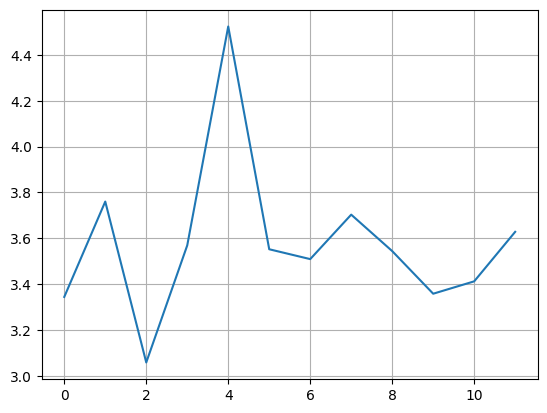

In [2115]:
def conso_by_day(day):
    conso_day = conso_data[conso_data['days']==day]
    conso_jour = len(conso_day)/1000
    return conso_jour
conso_graph=[]
for d in range(7,now.day+1):
    if d<10:pref='0'
    else:pref=''
    day = pref+str(d)+'/03/2024'
    conso_graph.append(conso_by_day(day))
    print(day,conso_by_day(day))
plt.plot(conso_graph)
plt.grid()

In [2116]:
#manuel
#day = '11/03/2024'


In [2117]:

conso_day = conso_data[conso_data['days']==day]
conso_jour = len(conso_day)
conso_jour

3628

In [2118]:
conso_day.head(1).dates, conso_day.tail(1).dates

(39333   2024-03-18 00:00:20.115557
 Name: dates, dtype: datetime64[ns],
 42960   2024-03-18 19:52:51.066557
 Name: dates, dtype: datetime64[ns])

In [2119]:
conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day

C:\Users\jean\AppData\Local\Temp\ipykernel_21524\1613890403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
39333,25513,0.14,25.513,141.104535,948993783,2024-03-18 00:00:20.115557,18/03/2024,0:0:20
39334,25433,0.14,25.433,141.548382,949019216,2024-03-18 00:00:45.548557,18/03/2024,0:0:45
39335,25545,0.14,25.545,140.927775,949044761,2024-03-18 00:01:11.093557,18/03/2024,0:1:11
39336,26515,0.14,26.515,135.772204,949071276,2024-03-18 00:01:37.608557,18/03/2024,0:1:37
39337,23501,0.15,23.501,153.184971,949094777,2024-03-18 00:02:01.109557,18/03/2024,0:2:1
...,...,...,...,...,...,...,...,...
42956,21444,0.17,21.444,167.879127,1020460571,2024-03-18 19:51:26.903557,18/03/2024,19:51:26
42957,21475,0.17,21.475,167.636787,1020482046,2024-03-18 19:51:48.378557,18/03/2024,19:51:48
42958,21079,0.17,21.079,170.786090,1020503125,2024-03-18 19:52:09.457557,18/03/2024,19:52:9
42959,20932,0.17,20.932,171.985477,1020524057,2024-03-18 19:52:30.389557,18/03/2024,19:52:30


In [2120]:
df= conso_day.set_index('heure')
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:20,25513,0.14,25.513,141.104535,948993783,2024-03-18 00:00:20.115557,18/03/2024
0:0:45,25433,0.14,25.433,141.548382,949019216,2024-03-18 00:00:45.548557,18/03/2024
0:1:11,25545,0.14,25.545,140.927775,949044761,2024-03-18 00:01:11.093557,18/03/2024
0:1:37,26515,0.14,26.515,135.772204,949071276,2024-03-18 00:01:37.608557,18/03/2024
0:2:1,23501,0.15,23.501,153.184971,949094777,2024-03-18 00:02:01.109557,18/03/2024
...,...,...,...,...,...,...,...
19:51:26,21444,0.17,21.444,167.879127,1020460571,2024-03-18 19:51:26.903557,18/03/2024
19:51:48,21475,0.17,21.475,167.636787,1020482046,2024-03-18 19:51:48.378557,18/03/2024
19:52:9,21079,0.17,21.079,170.786090,1020503125,2024-03-18 19:52:09.457557,18/03/2024


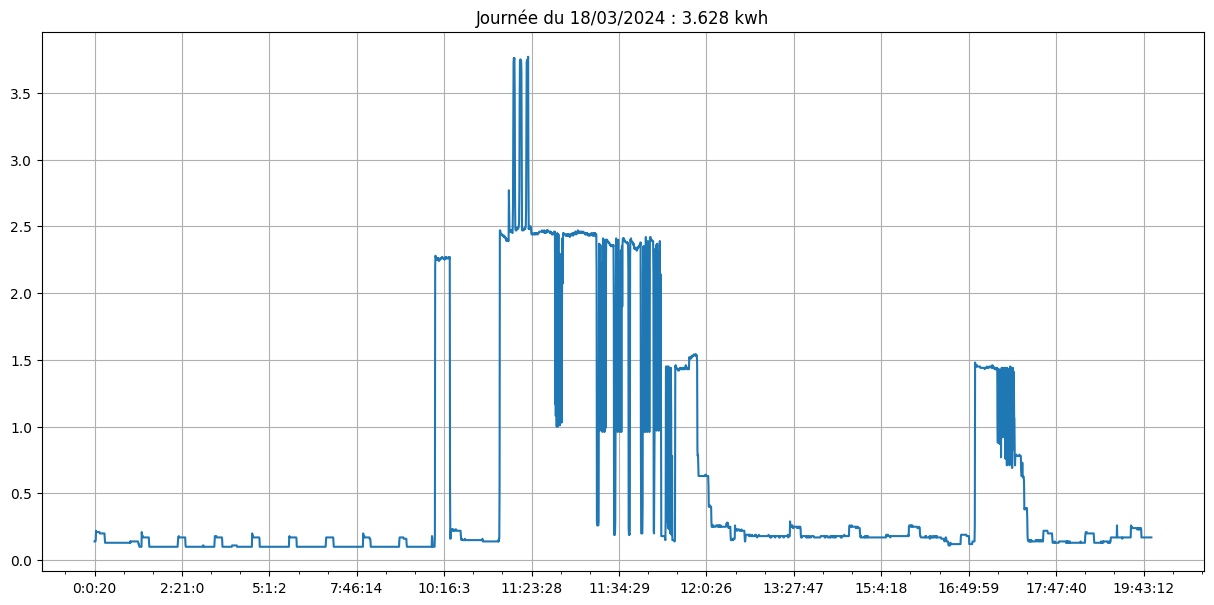

In [2121]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} : {conso_jour/1000} kwh')
plt.grid()

In [2122]:


time = conso_data['dates']
time


0       2024-03-07 00:24:12.621557
1       2024-03-07 00:24:38.864557
2       2024-03-07 00:25:04.749557
3       2024-03-07 00:25:30.503557
4       2024-03-07 00:25:56.277557
                   ...            
42956   2024-03-18 19:51:26.903557
42957   2024-03-18 19:51:48.378557
42958   2024-03-18 19:52:09.457557
42959   2024-03-18 19:52:30.389557
42960   2024-03-18 19:52:51.066557
Name: dates, Length: 42961, dtype: datetime64[ns]

In [2123]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [2124]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [2125]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

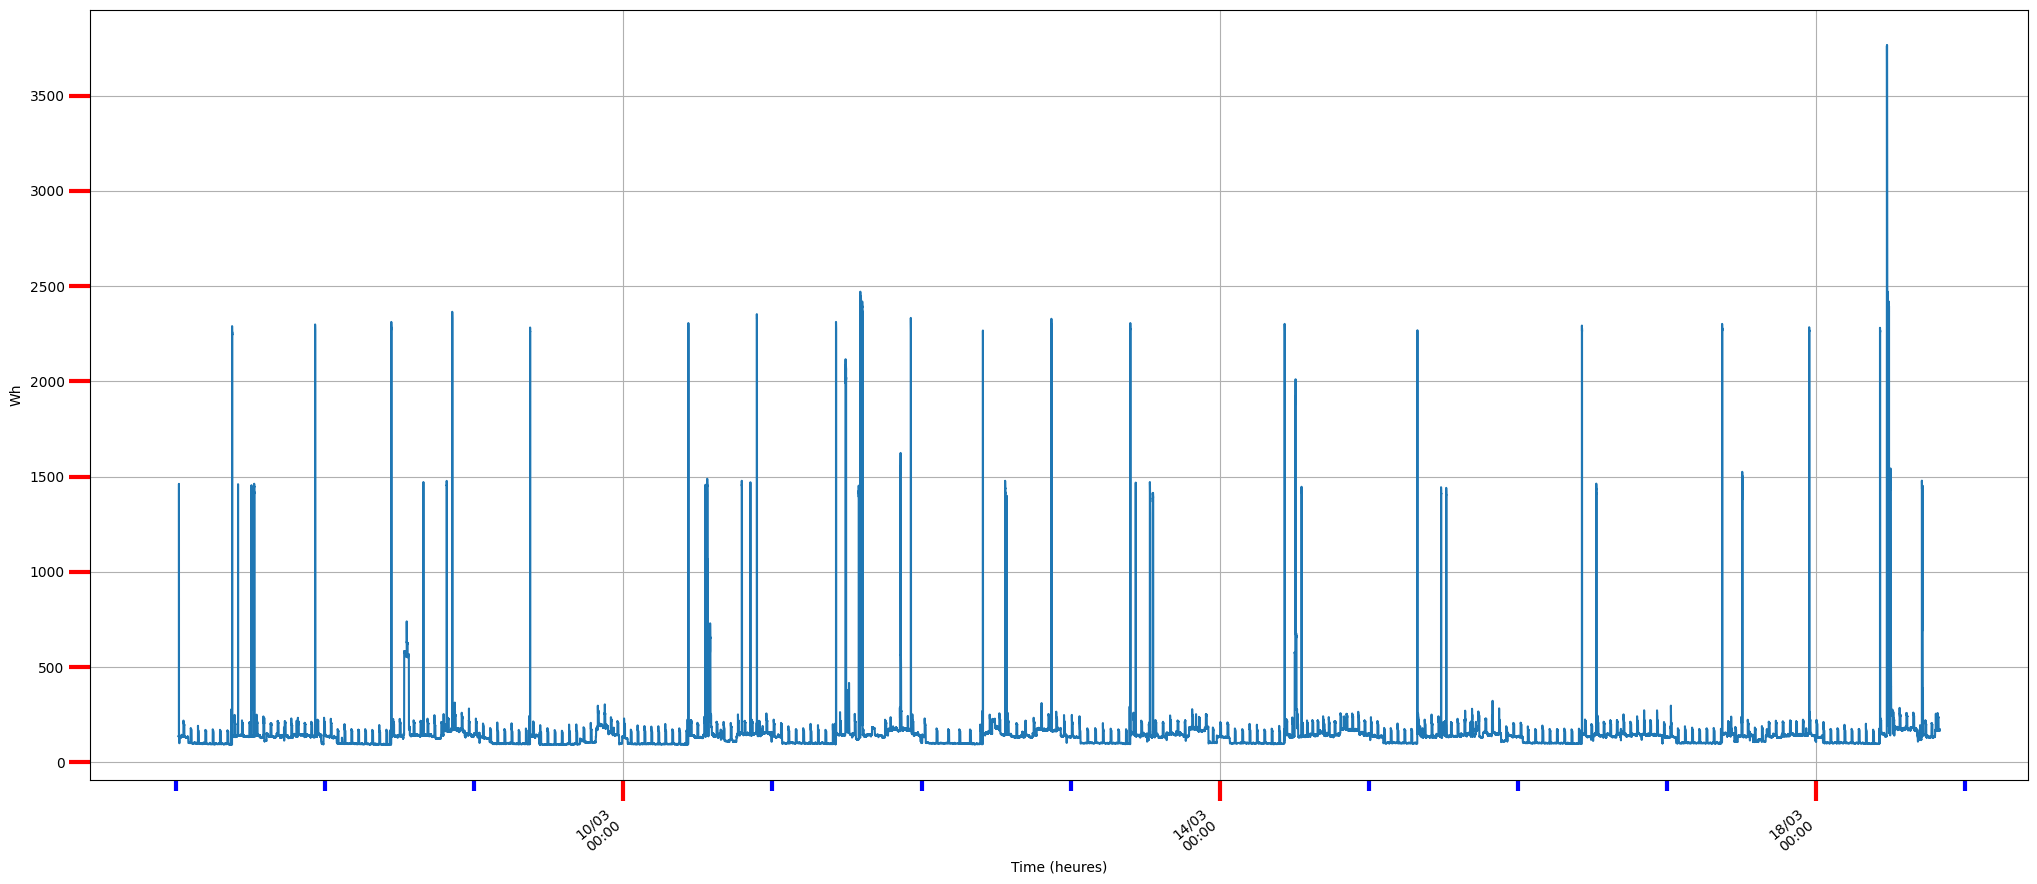

In [2126]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [2127]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
42960,20677,0.17,20.677,174.106495,1020544734,2024-03-18 19:52:51.066557,18/03/2024


In [2128]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1020544734000

# Slice of last 1 kWh

In [2129]:
l = len(conso_data)  # total watt consommés
l

42961

In [2130]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(42961, 1000)

In [2131]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [2132]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh   cumul(ms)  \
 41961     20067  0.18  20.067  179.399013  1001738924   
 41962     20509  0.17  20.509  175.532693  1001759433   
 41963     20353  0.18  20.353  176.878102  1001779786   
 41964     20219  0.18  20.219  178.050349  1001800005   
 41965     20465  0.17  20.465  175.910090  1001820470   
 ...         ...   ...     ...         ...         ...   
 42956     21444  0.17  21.444  167.879127  1020460571   
 42957     21475  0.17  21.475  167.636787  1020482046   
 42958     21079  0.17  21.079  170.786090  1020503125   
 42959     20932  0.17  20.932  171.985477  1020524057   
 42960     20677  0.17  20.677  174.106495  1020544734   
 
                            dates        days  
 41961 2024-03-18 14:39:25.256557  18/03/2024  
 41962 2024-03-18 14:39:45.765557  18/03/2024  
 41963 2024-03-18 14:40:06.118557  18/03/2024  
 41964 2024-03-18 14:40:26.337557  18/03/2024  
 41965 2024-03-18 14:40:46.802557  18/03/2024  
 ...   

In [2133]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [2134]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [2135]:
cumtime_end,cumtime_start

(1020544734000, 1001759433000)

In [2136]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

18785301000

In [2137]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 18, 19, 52, 58, 779348),
 datetime.datetime(2024, 3, 18, 14, 39, 53, 478348),
 '18/03/2024 19:52:51')

In [2138]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:24:12.621557,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:24:38.864557,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:25:04.749557,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:25:30.503557,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:25:56.277557,07/03/2024
...,...,...,...,...,...,...,...
42956,21444,0.17,21.444,167.879127,1020460571,2024-03-18 19:51:26.903557,18/03/2024
42957,21475,0.17,21.475,167.636787,1020482046,2024-03-18 19:51:48.378557,18/03/2024
42958,21079,0.17,21.079,170.786090,1020503125,2024-03-18 19:52:09.457557,18/03/2024
42959,20932,0.17,20.932,171.985477,1020524057,2024-03-18 19:52:30.389557,18/03/2024


In [2139]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('18/03/2024 14:39:45', '18/03/2024 19:52:51')

In [2140]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-18 14:39:25.256557', '2024-03-18 19:52:51.066557')

In [2141]:
k

1

In [2142]:
data.Interval.tail(1000)

41961    20067
41962    20509
41963    20353
41964    20219
41965    20465
         ...  
42956    21444
42957    21475
42958    21079
42959    20932
42960    20677
Name: Interval, Length: 1000, dtype: int64

In [2143]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(5.229410277777778, 4.589427626665148, 5, 13, 45)

In [2144]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_21524\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [2145]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
41961,20067,0.18,20.067,179.399013,1001738924,2024-03-18 14:39:25.256557,18/03/2024,2024-03-18 14:39:25.256557
41962,20509,0.17,20.509,175.532693,1001759433,2024-03-18 14:39:45.765557,18/03/2024,2024-03-18 14:39:45.765557
41963,20353,0.18,20.353,176.878102,1001779786,2024-03-18 14:40:06.118557,18/03/2024,2024-03-18 14:40:06.118557
41964,20219,0.18,20.219,178.050349,1001800005,2024-03-18 14:40:26.337557,18/03/2024,2024-03-18 14:40:26.337557
41965,20465,0.17,20.465,175.910090,1001820470,2024-03-18 14:40:46.802557,18/03/2024,2024-03-18 14:40:46.802557
...,...,...,...,...,...,...,...,...
42956,21444,0.17,21.444,167.879127,1020460571,2024-03-18 19:51:26.903557,18/03/2024,2024-03-18 19:51:26.903557
42957,21475,0.17,21.475,167.636787,1020482046,2024-03-18 19:51:48.378557,18/03/2024,2024-03-18 19:51:48.378557
42958,21079,0.17,21.079,170.786090,1020503125,2024-03-18 19:52:09.457557,18/03/2024,2024-03-18 19:52:09.457557
42959,20932,0.17,20.932,171.985477,1020524057,2024-03-18 19:52:30.389557,18/03/2024,2024-03-18 19:52:30.389557


<Axes: >

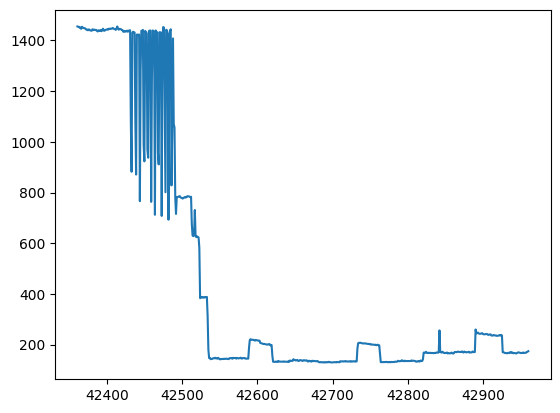

In [2146]:
data.tail(600)['Wh'].plot()

In [2147]:
data['Wh']

41961    179.399013
41962    175.532693
41963    176.878102
41964    178.050349
41965    175.910090
            ...    
42956    167.879127
42957    167.636787
42958    170.786090
42959    171.985477
42960    174.106495
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

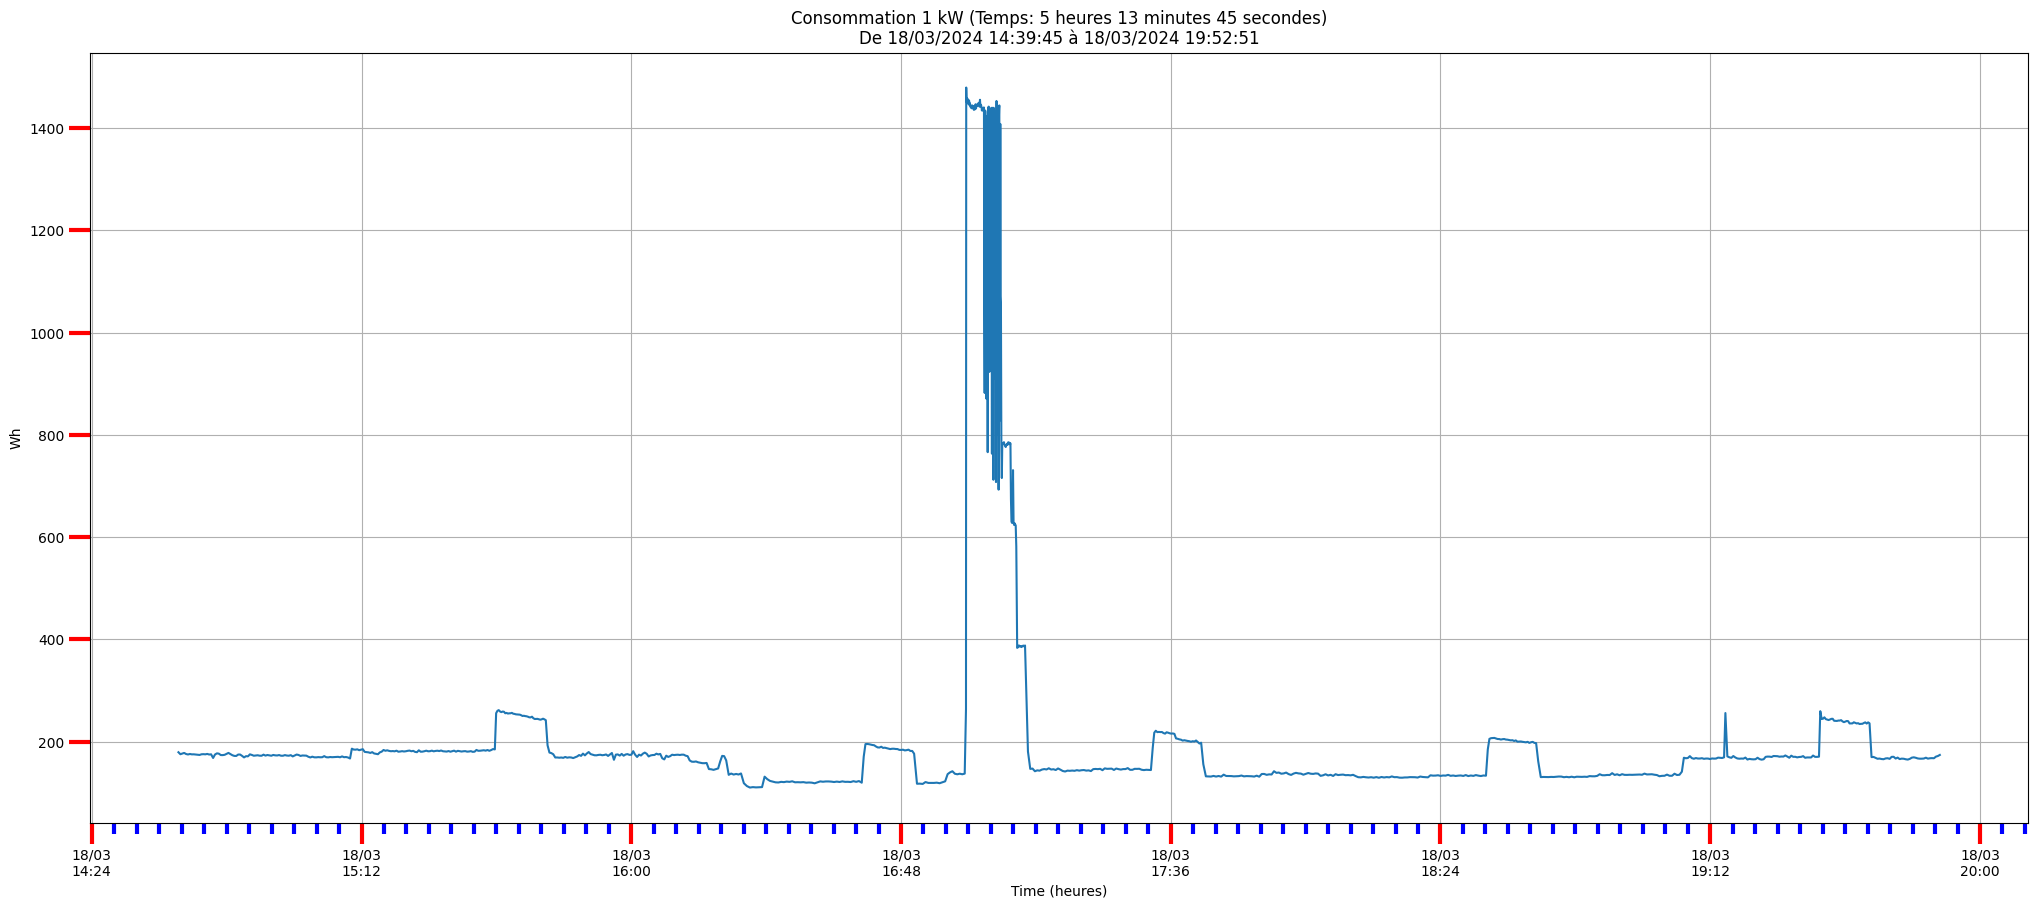

In [2148]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

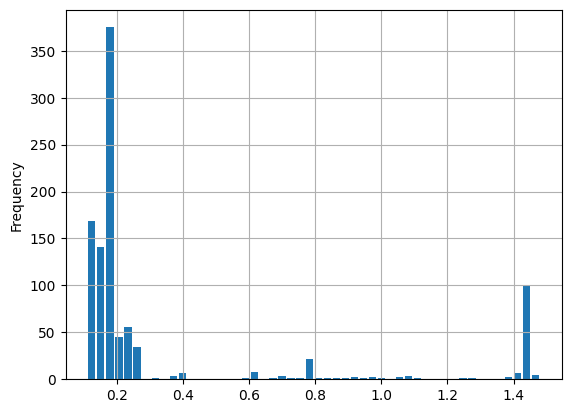

In [2149]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [2150]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
42956,21444,0.17,21.444,167.879127,1020460571,2024-03-18 19:51:26.903557,18/03/2024
42957,21475,0.17,21.475,167.636787,1020482046,2024-03-18 19:51:48.378557,18/03/2024
42958,21079,0.17,21.079,170.786090,1020503125,2024-03-18 19:52:09.457557,18/03/2024
42959,20932,0.17,20.932,171.985477,1020524057,2024-03-18 19:52:30.389557,18/03/2024
42960,20677,0.17,20.677,174.106495,1020544734,2024-03-18 19:52:51.066557,18/03/2024


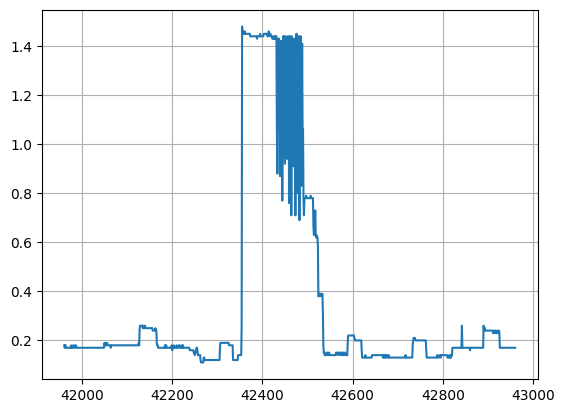

In [2151]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [2152]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(1020544734000.0, 17009.0789)

In [2153]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 18, 19, 53, 12, 215425),
 datetime.datetime(2024, 3, 7, 0, 24, 7, 481425))

In [2154]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(42961, 1020545, 283.4847222222222)

In [2155]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [2156]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [2157]:
732/12 # 60 jours

61.0

In [2158]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

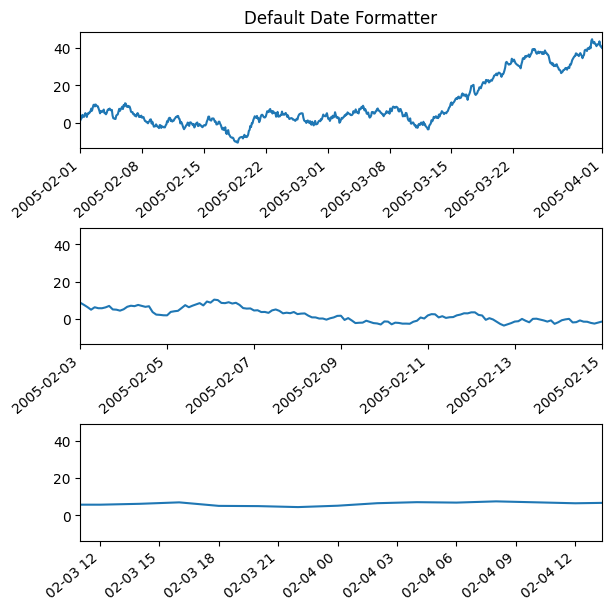

In [2159]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [2160]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)